# Timeslice a video in Python

More content like this can be found at [robotsquirrelproductions.com](https://robotsquirrelproductions.com/)

The lines below document the version of python used in this example

In [1]:
import sys
print(sys.version)

3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]


The openCV library may not be installed. I use pip to install it in the Jupyter notebook

In [2]:
# import sys
# !{sys.executable} -m pip install opencv-contrib-python

Import the libraries we need

In [3]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import os
import cv2

Setup the file names

In [4]:
str_anim_base = 'BallAnimation';
str_out_base = 'BallTimebase';

Define the location of the vertical line used to extract the pixels

In [5]:
i_col = 499

These steps assemble the frames created by POV-Ray into an animation and create the frames that will be assembled later for the timebase

In [6]:
ls_files = [f for f in os.listdir(os.getcwd()) if os.path.isfile(os.path.join(os.getcwd(), f))]

In [7]:
ls_images = list()
for file in ls_files:
    if file.endswith(".png"):
        ls_images.append(file)

Validate list of images

In [8]:
assert ls_images, 'Failed to find files'
n_Images = len(ls_images);

Set frame properties for the timebase using the first frame of this animation.

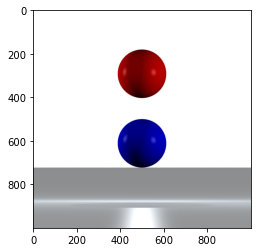

In [9]:
d_frame = cv2.imread(ls_images[1]);
imgplot = plt.imshow(d_frame)

Create the empty image frame with a white background for the timebase images

In [10]:
d_timebase = np.ones(np.shape(d_frame), dtype=np.uint8)*255
ls_size = d_timebase.shape

Create the animated video file for the input images

In [11]:
str_ball = str_anim_base + '.avi';
video = cv2.VideoWriter(str_ball, cv2.VideoWriter_fourcc('M','J','P','G'), 30, 
                        (ls_size[0], ls_size[1]));

Create the animated video file for the timebase image

In [12]:
str_timebase_video = str_out_base + '.avi';
video_timebase = cv2.VideoWriter(str_timebase_video, cv2.VideoWriter_fourcc('M','J','P','G'), 30, 
                        (ls_size[0], ls_size[1]));

Number of loops in the animation

In [13]:
for n_rep in range(3):
    
    # Operate on each frame
    for idx_frame in range(n_Images):
        
        # Add the frame to ball animations
        d_frame = cv2.imread(ls_images[idx_frame]);
        video.write(d_frame)
        
        # For the cube arrangement, it looks best if the pixels shift to
        # the right.
        d_timebase[:,1:,0] = d_timebase[:,0:-1,0];
        d_timebase[:,1:,1] = d_timebase[:,0:-1,1];
        d_timebase[:,1:,2] = d_timebase[:,0:-1,2];  
        
        # Extract the pixels, update the timebase image
        d_timebase[:,0,0] = d_frame[:,i_col,0];
        d_timebase[:,0,1] = d_frame[:,i_col,1];
        d_timebase[:,0,2] = d_frame[:,i_col,2];  
        
        # Write this new frame to the timebase animation
        video_timebase.write(d_timebase)

Plot out the final image as a check on the code

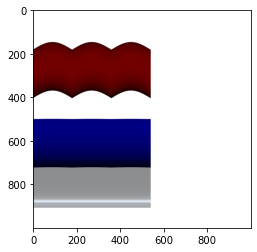

In [14]:
imgplot = plt.imshow(d_timebase)

With all the tasks complete, close out the video file.

In [15]:
video.release()
video_timebase.release()